## PROGRAMMING ASSIGNMENT 2 

    Based on KNN Notebook (shared), design a Linear Classifier. You are supposed to do an analysis of Curse of Dimensionality (dropping some features, classify again, and analysing the results -- as done for KNN Notebook). Also, compare the performance with KNN. 


## 1. Loading the Iris Dataset 

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [237]:

pd.set_option('display.max_columns', None)
from sklearn.datasets import load_iris
iris_data = load_iris()


In [238]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [239]:

iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [240]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [241]:
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [242]:
iris_df['Iris type'] = iris_data['target']
iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [243]:
iris_df['Iris name'] = iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
iris_df.head(150)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [244]:

iris_df_no_target = iris_df.drop(columns=['Iris type'])
iris_df_no_target.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [245]:
iris_df_no_target.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
Iris name                                                                   
sentosa                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
Iris name                                                                   
sentosa                 50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
Iris name                                                              
sentosa                50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

## 2. Basic preprocessing on Iris dataset

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

X = iris_data.data  # Features
y = iris_data.target  # Labels

# Standardize the features using Z-score normalization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Min-Max scaling of features
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print results
print("Original Features:")
print(X[:5])

print("\nStandardized Features:")
print(X_standardized[:5])

print("\nMin-Max Scaled Features:")
print(X_minmax_scaled[:5])

print("\nShape of Training and Testing Sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Standardized Features:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Min-Max Scaled Features:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

Shape of Training and Testing Sets:
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


<h2> 3. Building the KNN classifier model </h2>

Model Evaluation:
Accuracy: 0.89


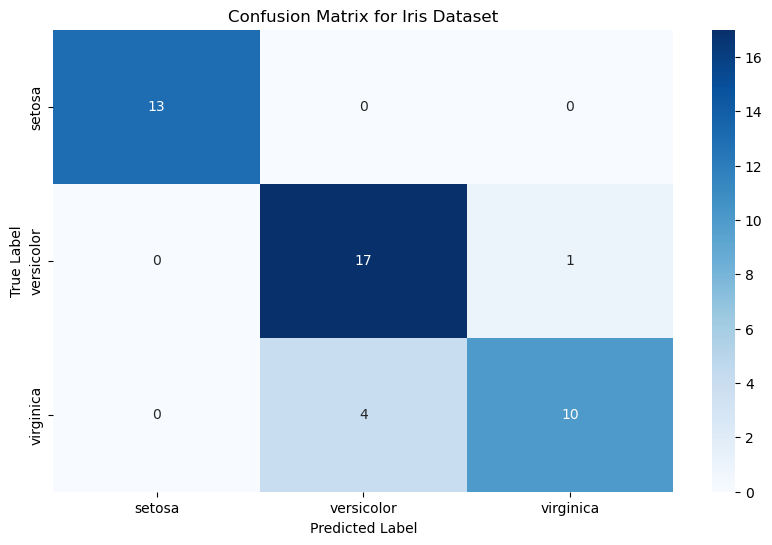


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      0.94      0.87        18
           2       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [249]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
# Load Iris dataset
iris_data = load_iris()

X = iris_data.data  # Features
y = iris_data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Standardize the features using Z-score normalization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn_model.fit(X_train_standardized, y_train)

# Predict the labels for the testing set
y_pred = knn_model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred) # Explain precision recall etc

# Print evaluation metrics
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\nClassification Report:")
print(class_report)

## 4. Building a Linear Classifier Model

Model Evaluation:
Accuracy: 0.89

Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        13
           1       0.00      0.00      0.00        18
           2       0.67      1.00      0.80        14

    accuracy                           0.60        45
   macro avg       0.40      0.67      0.50        45
weighted avg       0.36      0.60      0.45        45



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


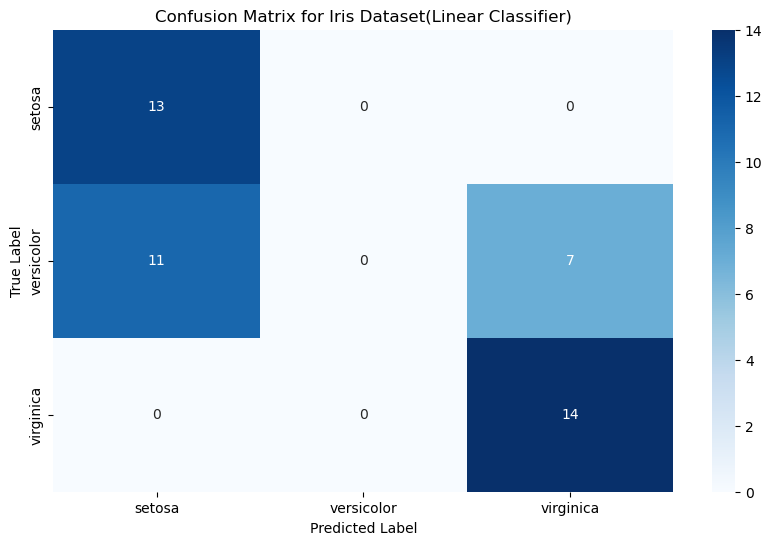

In [251]:
# Importing necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Instantiating the Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)

# Training the Perceptron model
perceptron.fit(X_train, y_train)
accuracy1=[]

# Making predictions
perceptron_predictions = perceptron.predict(X_test)
conf_matrix1=confusion_matrix(y_test, perceptron_predictions)
accuracy1 = accuracy_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy1:.2f}")
class_report2 = classification_report(y_test, perceptron_predictions)
# Evaluating the Perceptron model
print("\nPerceptron Classification Report:")
print(class_report2)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.title('Confusion Matrix for Iris Dataset(Linear Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 5.Curse of dimensionality Analysis

### (a) For KNN Classifier

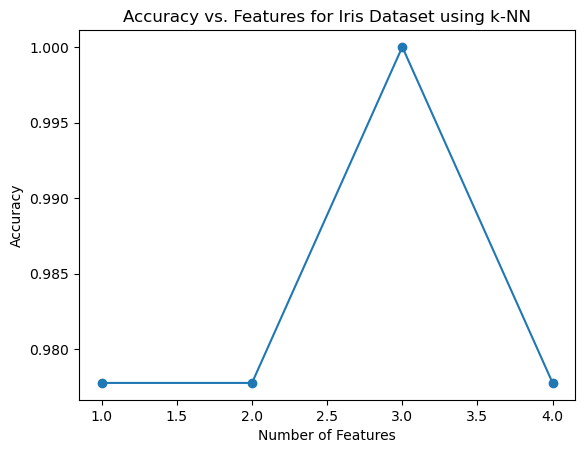

In [254]:
# accuracy vs features plot by removing one by one features for example 1st set is (sepal length, sepal width, petal length, petal width), 2nd set is (sepal length, sepal width,
# ,petal length) like this it goes on till only one feature left.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

num_features = X.shape[1]
accuracy_list = []

# Iterate through features
for i in range(num_features, 0, -1):
    # Remove i-th feature
    reduced_X = np.delete(X, i-1, axis=1)

    # Split the reduced dataset
    X_train_reduced, X_test_reduced, _, _ = train_test_split(reduced_X, y, test_size=0.3, random_state=42)

    # Fit k-NN model on reduced dataset
    knn.fit(X_train_reduced, y_train)

    y_pred = knn.predict(X_test_reduced)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_list.append(accuracy)

# Plotting the accuracy vs features
plt.plot(range(1, num_features + 1), accuracy_list, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Features for Iris Dataset using k-NN')
plt.show()

### (b) For Linear Classifier

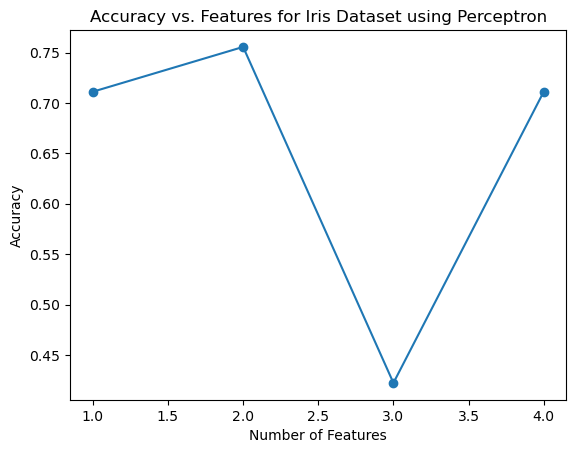

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Perceptron classifier
perceptron = Perceptron(random_state=42)

num_features = X.shape[1]
accuracy_list1 = []

# Iterate through features
for i in range(num_features, 0, -1):
    # Remove i-th feature
    reduced_X = np.delete(X, i-1, axis=1)

    # Split the reduced dataset
    X_train_reduced, X_test_reduced, _, _ = train_test_split(reduced_X, y, test_size=0.3, random_state=42)

    perceptron.fit(X_train_reduced, y_train)

    y_pred = perceptron.predict(X_test_reduced)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_list1.append(accuracy)

# Plotting the accuracy vs features
plt.plot(range(1, num_features + 1), accuracy_list1, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Features for Iris Dataset using Perceptron')
plt.show()

## 6. Comparison between KNN and Linear Classifier

model comparison
perceptron accuracy: 0.71
KNN accuracy: 0.89




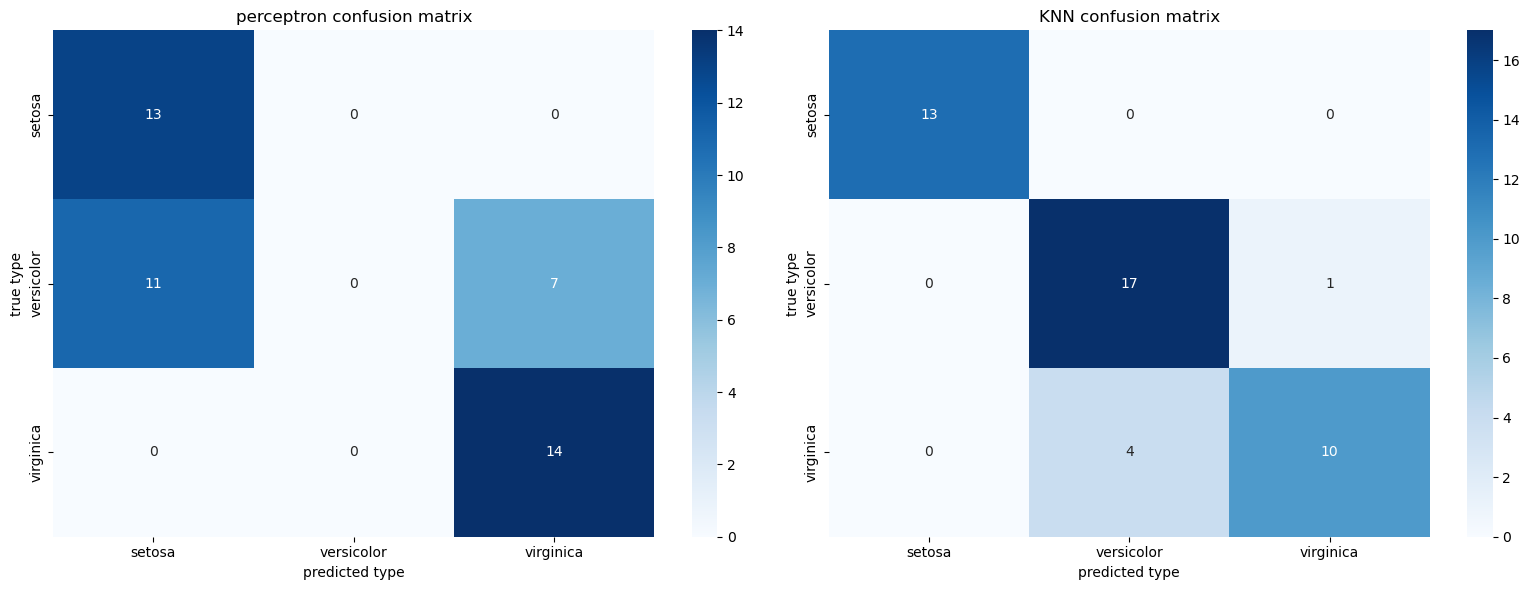

perceptron classification report
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        13
           1       0.00      0.00      0.00        18
           2       0.67      1.00      0.80        14

    accuracy                           0.60        45
   macro avg       0.40      0.67      0.50        45
weighted avg       0.36      0.60      0.45        45



KNN classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      0.94      0.87        18
           2       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [258]:

print("model comparison")
print(f"perceptron accuracy: {accuracy:.2f}")
print(f"KNN accuracy: {accuracy1:.2f}")
print("\n")
#plot
plt.figure(figsize=(16, 6)) #for seeing them side by side
#linear classifer
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.title('perceptron confusion matrix')
plt.xlabel('predicted type')
plt.ylabel('true type')
#KNN
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.title('KNN confusion matrix')
plt.xlabel('predicted type')
plt.ylabel('true type')
plt.tight_layout()
plt.show()
#classification reports
print("perceptron classification report")
print(class_report2)
print("\n")
print("KNN classification report")
print(class_report)

In [259]:

accuracy_list1  # Perceptron accuracy values
accuracy_list  # kNN accuracy values

# Create DataFrame
df = pd.DataFrame({
    'Number of Features': range(1, num_features + 1),
    'Perceptron Accuracy': accuracy_list1,
    'kNN Accuracy': accuracy_list
})

# Display the DataFrame
print("Accuracy Comparison DataFrame:")
df

Accuracy Comparison DataFrame:


,Number of Features,Perceptron Accuracy,kNN Accuracy
0,1,0.711111,0.977778
1,2,0.755556,0.977778
2,3,0.422222,1.000000
3,4,0.711111,0.977778
